In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

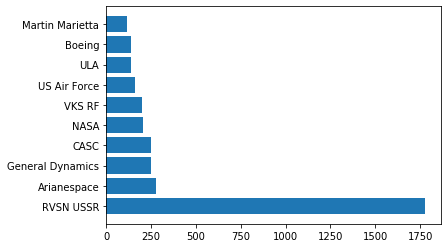

In [17]:
# https://www.kaggle.com/agirlcoding/all-space-missions-from-1957
# Все космические миссии с 1957 года
# Визуализация: распределение количества выполненных миссий по топ-10 компаниям
data = pd.read_csv('C:\\Users\\Professional\\Desktop\\Space_Corrected.csv')
data_company = data.groupby('Company Name').count()[['Datum']].sort_values('Datum', ascending=False).head(10)
dc = data_company.reset_index()
plt.barh(dc['Company Name'], dc['Datum'])

#Гипотеза: страна, которой больше нет, до сих пор лидирует по количеству осуществленных миссий, 
# и этот показатель больше примерно в 5 раз

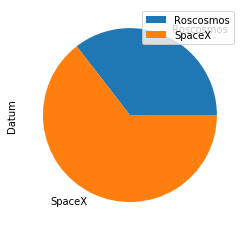

In [67]:
# Соотношение выполненных космических миссий Роскосмоса и СпэйсИкс
data_new = data[data['Company Name'].isin(['SpaceX', 'Roscosmos'])]
dn = data_new.groupby('Company Name').count()[['Datum']]
dn.plot(kind='pie', y='Datum')
# Гипотеза: зачем нам лифт с голосом Гагарина

C:\Users\Professional\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Professional\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<BarContainer object of 64 artists>

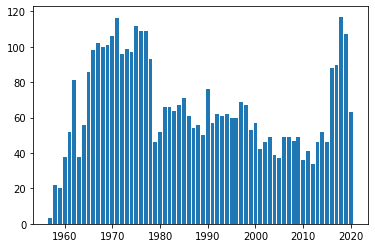

In [104]:

import datetime as dt
da = data[data.Datum.str.contains('\,\s\d{4}\s')]
da['Datum'] = pd.to_datetime(da['Datum'])
da['Year'] = da['Datum'].dt.year
dy = da.groupby('Year').count()[['Datum']].reset_index()

plt.bar(dy['Year'], dy['Datum'])
# Распределение всех (мировых) космических миссий по годам
# Гипотеза: резкое увеличение в 1958 году, резкий спад в 2020 году. 
# Развитие космического строения после войны, вирус в 2020 году.

C:\Users\Professional\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Professional\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<BarContainer object of 47 artists>

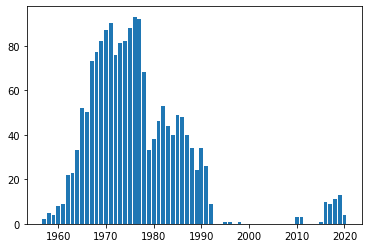

In [110]:

da = data[data.Datum.str.contains('\,\s\d{4}\s')]
da['Datum'] = pd.to_datetime(da['Datum'])
da['Year'] = da['Datum'].dt.year

da_cn = da[ (da['Company Name'] == 'Roscosmos') | (da['Company Name'] == 'RVSN USSR') ]

dy = da_cn.groupby('Year').count()[['Datum']].reset_index()
plt.bar(dy['Year'], dy['Datum'])
# Космические миссии России (сначала СССР, потом РФ) в разные годы
# Гипотеза: резкий взлет кол-ва миссий вместе с освоением космоса, спад во время перестройки, 
# отсутвие миссий во время и после развала, далее попытки восстановить.